# Ensemble tree methods

## First, let's walk through some sample codes to get you familar with tree classifiers and some sklearn functions for model evaluation. We then will guide you through some exercises.
## The dataset we used here is SpamBase dataset (we had it preprocessed and saved as spambase.data2):  https://archive.ics.uci.edu/ml/datasets/spambase


In [2]:
# Allow us to see plots in the notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import ensemble
from sklearn import datasets

import seaborn as sns

## Read in csv file, and explore rows and columns 

In [3]:
data = pd.read_csv('spambase.data2')
# look at first few rows
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
# use describe() to inspect numercical features
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


## Split data set and train a tree ensemble model.
### 1) In the following sample codes, we first trained a boosted tree classifier. Noted that boosted tree is additive model, we can plot out the misclassification error on the test set with number of iterations(weak learner). 
### (1a) split data into training and test set

In [5]:
from sklearn.model_selection import train_test_split

# split the data into training (80%) and test set (20%) randomly, in later application, you want to split them into 
# training/validation and test sets.
train, test = train_test_split(data, test_size=0.2)

### (1b) Train a boosted tree. Here we set hyper parameters at arbitrary number. In later task, you want to tune these parameters using cross-validation.

In [6]:
# =============== Hyper parameters ======================
# refer to lecture notes/sklearn websites for detailed description of the meaning of each parameter.
gb_params = {'n_estimators': 2000, 'max_depth': 5, 'random_state': 2,
                   'min_samples_split': 5, 'learning_rate': 0.01}
print(gb_params)

# ====================== Model fitting ===========================
# Initialize the Classifier and train the model by fitting training data
print("Training GradientBoostingClassifier...")
gb = ensemble.GradientBoostingClassifier(**gb_params)
gb.fit(train.iloc[:,:-1], train.iloc[:,-1])

# ============= compute test set missclassification error =====================
print("Compute boosted tree test error vs iterations...")

# for each iteration, we will save misclassification error
test_error_gb = np.zeros((gb_params['n_estimators'],), dtype=np.float64)

# staged_predict will use staged models (with 1,2,..n iterations) to predict test set label
# we then compare it with "true" label to calculate the misclassification error
for i, y_pred in enumerate(gb.staged_predict(test.iloc[:,:-1])):
    acc = 0
    for j, y_j in enumerate(test.iloc[:,-1]):
        if y_pred[j] == y_j:
            acc += 1
    acc = acc*1.0/len(test.iloc[:,-1])
    test_error_gb[i] = 1 - acc 

{'learning_rate': 0.01, 'n_estimators': 2000, 'random_state': 2, 'min_samples_split': 5, 'max_depth': 5}
Training GradientBoostingClassifier...
Compute boosted tree test error vs iterations...


### (1c) Unlike boosted tree, random forest does NOT build the ensemble tree in a sequential manner. Therefore, it does not have "intermediate" model stored. Instead, we will iterate over # of trees to get the test set error with increasing number of trees. In practice, you do not need to do so many test (usually a increase of 100 is normal, e.g., 50, 100, 200, 300, 500...)

In [7]:
# Here, we will try tree numbers from 1 to 2000 (to compare with boosted tree), at an interval of 50.
test_error_rf = np.zeros((len(range(1, 2000, 50)),), dtype=np.float64)
print("Training RandomForestClassifier...")

# this might take a few minuts to run
for i, trees in enumerate(range(1, 2000, 50)):
    # we still used arbitrary number for the following parameters below
    # refer to class slides/sklearn website to understand what they mean
    rf_params = {'n_estimators': trees, 'max_depth': 5, 'random_state': 2,
                   'min_samples_split': 5, 'max_features': 'sqrt'}
    
    # ======== initialize and train RandomForest Classifier  ============
    rf = ensemble.RandomForestClassifier(**rf_params)
    rf.fit(train.iloc[:,:-1], train.iloc[:,-1])
    
    # ======== compute test set missclassification error for inreasing number of trees ============
    acc = 0
    y_pred = rf.predict(test.iloc[:,:-1])
    for j, y_j in enumerate(test.iloc[:,-1]):
        if y_pred[j] == y_j:
            acc += 1
    acc = acc*1.0/len(test.iloc[:,-1])
    test_error_rf[i] = 1 - acc 

Training RandomForestClassifier...


### (1d) We plot out the missclassification error for both classifier when they have same # of trees and similar parameters for each tree.

Plot test error vs trees...


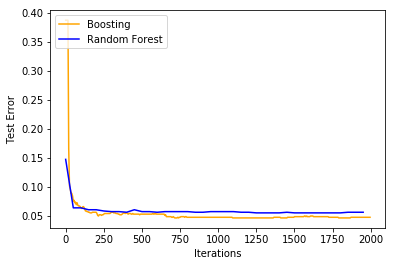

In [8]:
print("Plot test error vs trees...")
plt.figure()
plt.plot((np.arange(test_error_gb.shape[0]) + 1)[::5], test_error_gb[::5],
        '-', color='orange', label='Boosting')
plt.plot((np.arange(1, 2000, 50))[::1], test_error_rf[::1],
        '-', color='blue', label='Random Forest')

plt.legend(loc='upper left')
plt.xlabel('Iterations')
plt.ylabel('Test Error')

plt.show()

### (1e) ROC curve - is misclassification error the only thing we care about?
### ROC curves typically have true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of 0, and a true positive rate of 1. A larger area under the curve (AUC) is usually better. The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.
### Here, we use ROC curve in addition to evaluate model performacne. We plot out ROC curve (test set) for our model and calculate AUC (area under curve) using sklearn module function roc_curve and auc. Typically AUC > 0.8 is good model, 0.6-0.8 is ok but not great.

Predicted probability of class 1: [ 0.0958212   0.99826747  0.83564261  0.30169479  0.73663189  0.05094419
  0.99552614  0.00498755  0.99813427  0.48429627]
True label: [0, 1, 1, 0, 1, 0, 1, 0, 1, 1]
Predicted probability of class 1: [ 0.06077155  0.96817502  0.426845    0.30529245  0.27314332  0.15352759
  0.96931746  0.21378845  0.97294002  0.5182173 ]
True label: [0, 1, 1, 0, 1, 0, 1, 0, 1, 1]


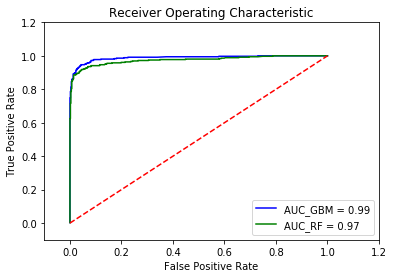

In [21]:
from sklearn.metrics import roc_curve, auc

# predict_proba returns #data x #classes, each column is probability of one class
predictions = gb.predict_proba(test.iloc[:,:-1])
test_label = test.iloc[:,-1]
print("Predicted probability of class 1: {}".format(predictions[:, 1][0:10]))
print("True label: {}".format(list(test_label[0:10])))

false_positive_rate, true_positive_rate, thresholds = roc_curve(test_label, predictions[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)

# plot ROC for gb model
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC_GBM = %0.2f'% roc_auc)

# repeat it for random forest model
predictions = rf.predict_proba(test.iloc[:,:-1])
test_label = test.iloc[:,-1]
print("Predicted probability of class 1: {}".format(predictions[:, 1][0:10]))
print("True label: {}".format(list(test_label[0:10])))

false_positive_rate, true_positive_rate, thresholds = roc_curve(test_label, predictions[:, 1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'g',
label='AUC_RF = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### (1f) We can also explore important features output by those models

[Text(0,0.5,''), Text(0.5,0,'Importance')]

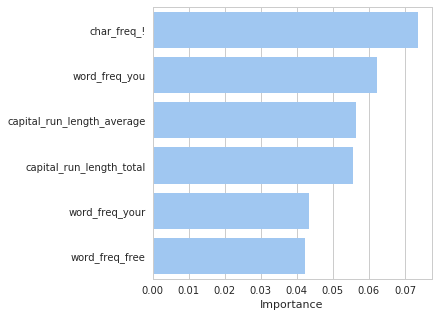

In [22]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(5, 5))
# top 6 most imporant features
n_feature = 6
feature_names = train.columns
# rank by important scores
indices = np.argsort(gb.feature_importances_)
factorDF = pd.DataFrame(data = np.array(feature_names)[indices[n_feature*-1:]][::-1])
factorDF.columns = ['Feature Name']
factorDF['Importance'] = gb.feature_importances_[indices[n_feature*-1:]][::-1]
sns.set_color_codes("pastel")
sns.barplot(x="Importance", y="Feature Name", data=factorDF,color="b")
ax.set(ylabel="",xlabel="Importance")

# Now let's do some exercises :)
### In practice, the data is more complicated and often we need to tune those hyper parameters to get a better model performance. 
### The exercise would be to use cross validation to improve model performance. You can either choose random forest or boosted tree for this exercise. If you have more time, you can try both.
### We outline some steps to help you do this exercise.

### a). Split data into train/validation and test data (do this if you want to train boosted tree model, otherwise, you can just use train test set we generated).

### b). Try different combination tree depth and min_sample_split values to use and train the model, compute and record validation set error (OOB error if random forest) for each combination. 

### Bonus point: If you have time, plot out the misclassification error with tree depth,  and min_sample_split. Is it monotonic? Can you explain intuitively why you see such trends?


### c). Choose the best combination of parameters you obtained in step b) and its corresponding model, and use this model to predict test data. Report the misclassification error on test set and plot ROC curve. 
### What does each point in ROC curve mean?